# Demo No. 6 - Producing synthetic light curves

This demo will finally provide a quick guide trough a process of generating a light curve.

## Defining a binary system

Initially, we will define a binary model as usual:

In [1]:
%matplotlib notebook
from astropy import units as u

from elisa import BinarySystem
from elisa import Star

from elisa import settings

primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=5,  # angular size (in degrees) of the surface elements
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.0,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2021-06-16 10:45:21,451 - 9220 - binary_system.system - INFO: initialising object BinarySystem
2021-06-16 10:45:21,481 - 9220 - binary_system.system - INFO: setting discretization factor of secondary component to 8.29 according to discretization factor of the primary component.


## Defining observer class instance

In order to be able to specify observer-dependent parameters of the light curve such as passband we have to define `Observer` class: 

In [2]:
from elisa.observer.observer import Observer

o = Observer(passband=[  # defining passbands at which calculate a light curve
#     'Generic.Bessell.U',
    'Generic.Bessell.B',
    'Generic.Bessell.V',
    'Generic.Bessell.R',
    'Generic.Bessell.I',
                      ],
             system=bs)  # specifying the binary system to use in light curve synthesis

2021-06-16 10:45:21,487 - 9220 - observer.observer - INFO: initialising Observer instance


List of all available passbands can be found here:

In [3]:
settings.PASSBANDS

['bolometric',
 'Generic.Bessell.U',
 'Generic.Bessell.B',
 'Generic.Bessell.V',
 'Generic.Bessell.R',
 'Generic.Bessell.I',
 'SLOAN.SDSS.u',
 'SLOAN.SDSS.g',
 'SLOAN.SDSS.r',
 'SLOAN.SDSS.i',
 'SLOAN.SDSS.z',
 'Generic.Stromgren.u',
 'Generic.Stromgren.v',
 'Generic.Stromgren.b',
 'Generic.Stromgren.y',
 'Kepler',
 'GaiaDR2',
 'TESS']

`Observer` enables to perform ''observations''. Synthetic light curve of our binary system can be produced using function on our `Observer` class instance: 

In [4]:
phases, fluxes = o.observe.lc(
    from_phase=-0.6,
    to_phase=0.6,
    phase_step=0.01,
    # normalize=True  # this will produce observations normalized to 1
)

2021-06-16 10:45:21,580 - 9220 - observer.observer - INFO: observation is running
2021-06-16 10:45:22,877 - 9220 - observer.observer - INFO: observation finished


This function returns `phases` in which synthetic light curves were produced and `curves` dictionary with synthetic light curves for every passband specifyied in `observer` class.

In [5]:
fluxes

{'Generic.Bessell.B': array([7.66237214e+26, 7.64040933e+26, 7.59030819e+26, 7.50128998e+26,
        7.38479804e+26, 7.25360274e+26, 7.12370072e+26, 7.01043173e+26,
        6.93560696e+26, 6.91946587e+26, 6.91849656e+26, 6.91946587e+26,
        6.93560696e+26, 7.01043173e+26, 7.12370072e+26, 7.25360274e+26,
        7.38479804e+26, 7.50128998e+26, 7.59030819e+26, 7.64040933e+26,
        7.66237214e+26, 7.68577023e+26, 7.71004627e+26, 7.73515597e+26,
        7.76115481e+26, 7.78718478e+26, 7.81280170e+26, 7.83700277e+26,
        7.86106641e+26, 7.88253899e+26, 7.90185169e+26, 7.91895255e+26,
        7.93220231e+26, 7.94203095e+26, 7.94796217e+26, 7.95022467e+26,
        7.94705453e+26, 7.93994475e+26, 7.92837040e+26, 7.91259986e+26,
        7.89198935e+26, 7.86796399e+26, 7.84055521e+26, 7.80923886e+26,
        7.77647348e+26, 7.74107739e+26, 7.70417455e+26, 7.66639409e+26,
        7.62879934e+26, 7.59159561e+26, 7.55512006e+26, 7.52018987e+26,
        7.37204413e+26, 7.09573089e+26, 6.7

## Visualizing the results

Resulting light curves can be visualized very similarly as in the case of `BinarySystem` instance:

<IPython.core.display.Javascript object>


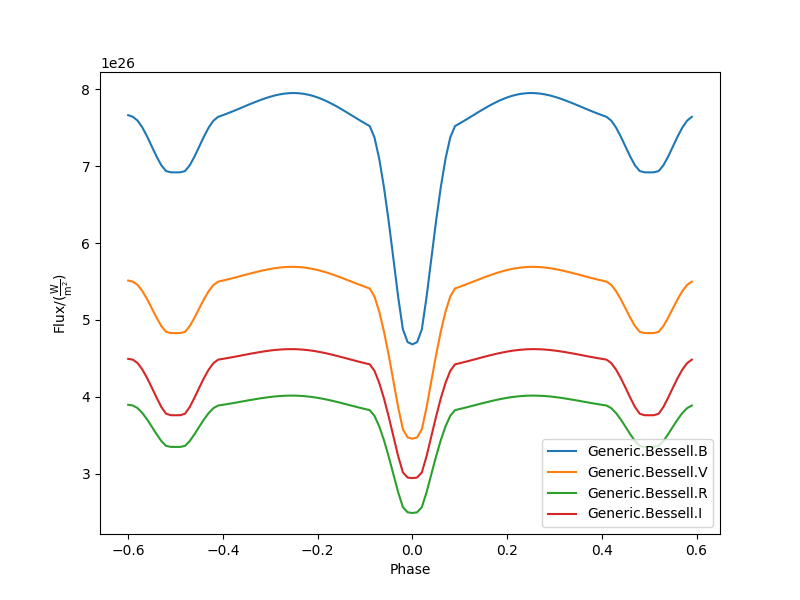

In [6]:
o.plot.phase_curve(phases=phases, fluxes=fluxes)